In [2]:
import snap
import numpy as np
import pandas as pd
import sys
import os
import argparse
import matplotlib.pyplot as plt
import random as random

In [3]:
def ER_degree_distribution(N, E):

    Graph = snap.TNEANet.New()
    for index in range(1,N+1): Graph.AddNode(index)
    while(Graph.GetEdges() < E):
        SrcNId = random.randint(1,N)
        DstNId = random.randint(1, N)
        if Graph.IsEdge(SrcNId, DstNId) is False:
            Graph.AddEdge(SrcNId, DstNId)
    NodeItr = Graph.BegNI()
    distribution = {}
    for node in range(0, Graph.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeDeg in distribution: distribution[nodeDeg] += 1
        else: distribution[nodeDeg] = 1
        NodeItr.Next()
        
    X, Y= [], []
    for key in distribution:
        X.append(key)
        Y.append(distribution[key])
        
    return X,Y

In [4]:
def calculate_degree_distribution(name, G):
    NodeItr = G.BegNI()
    distribution = {}
    for node in range(0, G.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeDeg in distribution: distribution[nodeDeg] += 1
        else: distribution[nodeDeg] = 1
        NodeItr.Next()

    X, Y = [], []
    for key in distribution:
        X.append(key)
        Y.append(set1_distribution[key])
   # X_ER, Y_ER = ER_degree_distribution(G.GetNodes(), G.GetEdges())
    
    plt.scatter(X, Y, s = 5, color = 'g', label = set1_name + ' Distribution', alpha = 1)
    #plt.scatter(X_ER, Y_ER, s = 5, color = 'black', label = 'Erdos-Renyi Distribution', alpha = 1)                                   
    plt.xscale('log')
    plt.yscale('log')
   # plt.title("Degree Distribution for " + graph_name)
    plt.xlabel("Degree (Log Scale)")
    plt.ylabel("Number of Nodes (Log Scale)")
    plt.legend()
    plt.savefig(name + " Distribution.pdf")
    plt.show()

In [5]:
def calculate_degree_distributions(G, set1, set2, set1_name, set2_name, graph_name):
    NodeItr = G.BegNI()
    set1_distribution, set2_distribution = {}, {}
    for node in range(0, G.GetNodes()):
        nodeId = NodeItr.GetId()
        nodeDeg = NodeItr.GetDeg()
        if nodeId in set1:
            if nodeDeg in set1_distribution: set1_distribution[nodeDeg] += 1
            else: set1_distribution[nodeDeg] = 1
        else:
            if nodeDeg in set2_distribution: set2_distribution[nodeDeg] += 1
            else: set2_distribution[nodeDeg] = 1
        NodeItr.Next()

    X_set1, Y_set1, X_set2, Y_set2 = [], [], [], []
    for key in set1_distribution:
        X_set1.append(key)
        Y_set1.append(set1_distribution[key])
    for key in set2_distribution:
        X_set2.append(key)
        Y_set2.append(set2_distribution[key])
    
   # X_ER, Y_ER = ER_degree_distribution(G.GetNodes(), G.GetEdges())
    
    plt.scatter(X_set1, Y_set1, s = 5, color = 'r', label = set1_name + ' Distribution', alpha = 1)
    plt.scatter(X_set2, Y_set2, s = 5, color = 'b', label = set2_name +' Distribution', alpha = 1)
    #plt.scatter(X_ER, Y_ER, s = 5, color = 'black', label = 'Erdos-Renyi Distribution', alpha = 1)                                   
    plt.xscale('log')
    plt.yscale('log')
   # plt.title("Degree Distribution for " + graph_name)
    plt.xlabel("Degree (Log Scale)")
    plt.ylabel("Number of Nodes (Log Scale)")
    plt.legend()
    plt.savefig(graph_name + " Distribution.pdf")
    plt.show()

Number of company nodes in the network:  11572
Number of investor nodes in the network:  10465
Number of company-investor nodes:  92
Number of total nodes in the network:  21945
Number of Edges in the network:  52868
Graph Density:  0.000109784619637
Cluster Coefficient:  0.000364636214497


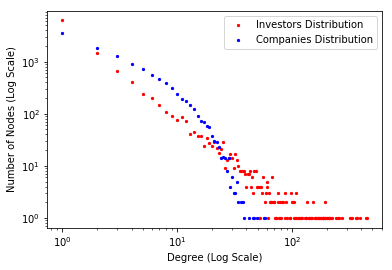

In [6]:
FIn = snap.TFIn('../graphs/investments-to-companies_TNEANet/investments-to-companies.graph')
investors = np.load('../graphs/investments-to-companies_TNEANet/bipartite_source_class.npy')
companies = np.load('../graphs/investments-to-companies_TNEANet/bipartite_dest_class.npy')

InvestToComp = snap.TNEANet.Load(FIn)
nodeCount = InvestToComp.GetNodes()
edgeCount = InvestToComp.GetEdges()
print "Number of company nodes in the network: ", len(companies)
print "Number of investor nodes in the network: ", len(investors)
print "Number of company-investor nodes: ", abs(nodeCount - len(companies) - len(investors))
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (1.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(InvestToComp)
calculate_degree_distributions(InvestToComp, investors, companies, "Investors", "Companies", "Investors-to-Companies")

Number of company nodes in the network:  4563
Number of acquirer nodes in the network:  2641
Number of company-acquirer nodes:  278
Number of total nodes in the network:  6926
Number of Edges in the network:  4651
Graph Density:  9.69714912989e-05
Cluster Coefficient:  0.000364636214497


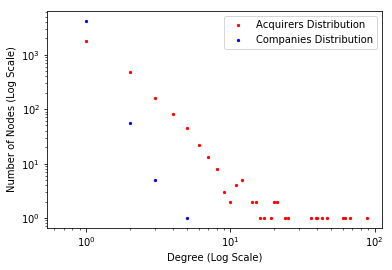

In [7]:
FIn = snap.TFIn('../graphs/companies-to-acqui_TNEANet/companies-to-acqui.graph')
companies = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_source_class.npy')
acquirers = np.load('../graphs/companies-to-acqui_TNEANet/bipartite_dest_class.npy')

CompToAqui = snap.TNEANet.Load(FIn)
nodeCount = CompToAqui.GetNodes()
edgeCount = CompToAqui.GetEdges()
print "Number of company nodes in the network: ", len(companies)
print "Number of acquirer nodes in the network: ", len(acquirers)
print "Number of company-acquirer nodes: ", abs(nodeCount - len(companies) - len(acquirers))
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (1.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(InvestToComp)
calculate_degree_distributions(CompToAqui, acquirers, companies, "Acquirers", "Companies", "Companies-to-Acquirers")

In [3]:
FIn = snap.TFIn('../graphs/investments-to-companies_TNEANet/investments-to-companies_TNEANet_folded_reverse_order.graph')

InvestedComp = snap.TNEANet.Load(FIn)
nodeCount = InvestedComp.GetNodes()
edgeCount = InvestedComp.GetEdges()
print "Number of total nodes in the network: ", nodeCount
print "Number of Edges in the network: ", edgeCount
print "Graph Density: ", (1.0*edgeCount)/(nodeCount*(nodeCount-1))
print "Cluster Coefficient: ", snap.GetClustCf(InvestedComp)
calculate_ditribution("Invested-Companies", InvestedComp)

RuntimeError: Error reading file '../graphs/investments-to-companies_TNEANet/investments-to-companies_TNEANet_folded_reverse_order.graph'.

In [ ]:
# Build tripartite graph
# Writeup implementation and nextsteps